## Introduction

$$f(x,y) = (x+y, 2x+3y)$$

$$A = \left( \begin{array}{cc}1 & 1 \\ 2 & 3 \end{array} \right) $$

In [15]:
%matplotlib notebook

import numpy as np
import matplotlib.patches as patches
from matplotlib import pyplot as plt
from matplotlib import animation
from sympy import *

<IPython.core.display.Javascript object>


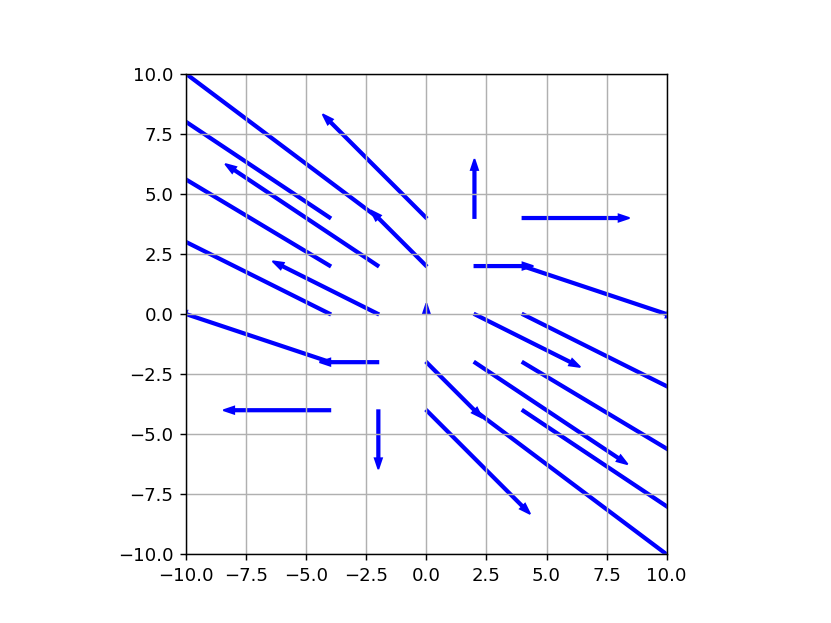

In [15]:
A = np.matrix([[2,-1], [-1,1]])

fig1 = plt.figure()
ax1 = plt.axes()

ax1.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
ax1.set_ylim(-10, 10)
ax1.set_xlim(-10, 10)

for i in range(-4, 5, 2):
    for j in range(-4, 5, 2):
        x = np.matrix([[i],[j]])
        y = A*x
        ax1.arrow(float(x[0]) , float(x[1]), float(y[0]) , float(y[1]), width=0.1, color='b')
        #ax1.arrow(0,0, float(y[0]) , float(y[1]), width=0.1, color='r')

plt.show()

In [ ]:
def gsBasis(A) :
    # Make B as a copy of A, since we're going to alter it's values.
    B = np.array(A, dtype=np.float_) 
    
    # Loop over all vectors, starting with zero, label them with i
    #print(B.shape[1])
    
    for i in range(B.shape[1]) :
        # Inside that loop, loop over all previous vectors, j, to subtract.
        for j in range(i) :
            # Complete the code to subtract the overlap with previous vectors.
            # you'll need the current vector B[:, i] and a previous vector B[:, j]
            #print(j)
            B[:, i] -=  B[:, i] @ B[:, j] * B[:, j]
            
            
        # Next insert code to do the normalisation test for B[:, i]
        if la.norm(B[:, i]) > 1.0e-14 :
            B[:, i] = B[:, i] / la.norm(B[:, i])
        else :
            B[:, i] = np.zeros_like(B[:, i])
        #print(B[:,i])
    # Finally, we return the result:
    return B

In [16]:
def inner_product(f, g, x):
    return integrate(f*g, (x, -pi, pi))

x = Symbol('x')
sin_x = sin(x)

# basis
A = [1., x, x**2, x**3, x**4, x**5]
B = np.array(A)

for i in range(len(A)):
    for j in range(i):
        B[i] -= inner_product(B[i], B[j], x).evalf() * B[j]
    
    B[i] = B[i]/sqrt(inner_product(B[i], B[i], x).evalf())
  
# Orthogonal basis
for i in range(len(B)):
    print(B[i])


0.398942280401433
0.219948406790773*x
0.135577175410079*x**2 - 0.446031029038193
0.08510390269479*x**3 - 0.503965111551828*x
0.0537538886225831*x**4 - 0.454739670621526*x**2 + 0.448810065451613
0.0340492544849722*x**5 - 0.373391857687437*x**3 + 0.7896921261349*x


In [17]:
sum = 0
for i in range(len(A)):
    sum += inner_product(B[i], sin_x, x)*B[i]

sin_approximation = sum.evalf()
print(sin_approximation)

0.00564311797634744*x**5 - 0.155271410633436*x**3 + 0.98786213557469*x


In [18]:
domain = np.linspace(-2*np.pi, 2*np.pi, 1000)

y = []
for d in domain:
    y.append(sin_approximation.subs(x, d))

#print(y)

<IPython.core.display.Javascript object>


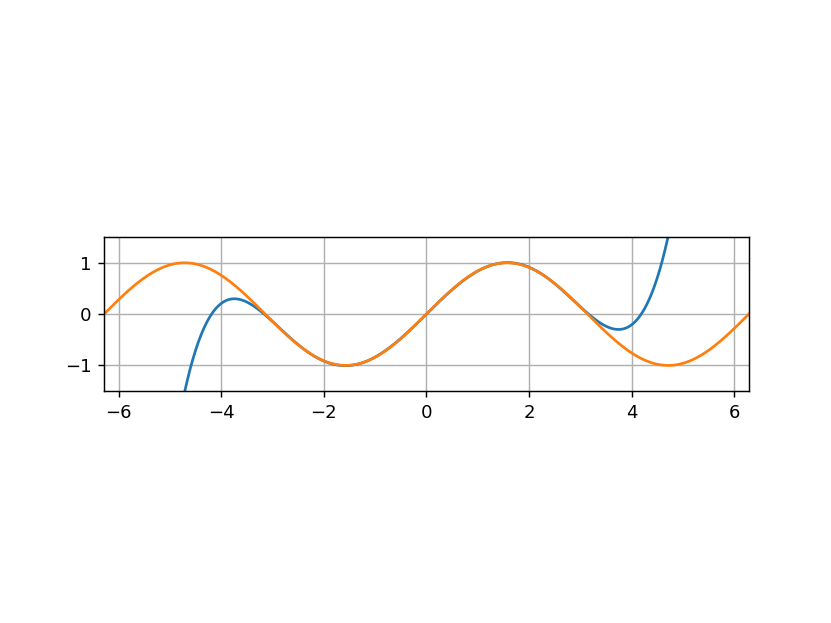

In [20]:
fig1 = plt.figure()
ax1 = plt.axes()

ax1.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlim(-2*np.pi, 2*np.pi)

ax1.plot(domain, y)
ax1.plot(domain, np.sin(domain))

plt.show()